# Fitting ARIMA models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data description



https://sacac.org.za/wp-content/uploads/2023/07/plantwide-chemicals-bauer-2007.csv

| Attribute            | Value                                         |
|----------------------|-----------------------------------------------|
| Type of measurements | 9 temperature, 1 level                        |
| Industry             | Chemicals                                     |
| Data length          | 2881                                          |
| Sampling rate        | 20 seconds                                    |
| Company              | Eastman chemical company                      |
| Normalised           | No                                            |
| Contributor          | Margret Bauer, University of Pretoria, South Africa |
| Year of origin       | 2007                                          |

First appearance in publication: Bauer, M., Cox, J. W., Caveness, M. H., Downs, J. J., & Thornhill, N. F. (2007). Nearest neighbors methods for root cause analysis of plantwide disturbances. Industrial & Engineering Chemistry Research, 46(18), 5977-5984.

https://doi.org/10.1021/ie0614834

Description: This is Case Study 1 from Bauer et al. which is a periodic, non-sinusoidal oscillation of around 20 minutes that affected measurements around a distillation column. 

## Load data and fit model

For this exercise, we will look at a single times series from the data set and try to fit an appropriate model. We will consider the `TC` feature. Let's extract this feature into a single variable `ts` (time series) and plot it:

<Axes: title={'center': 'TC1 Time Series'}>

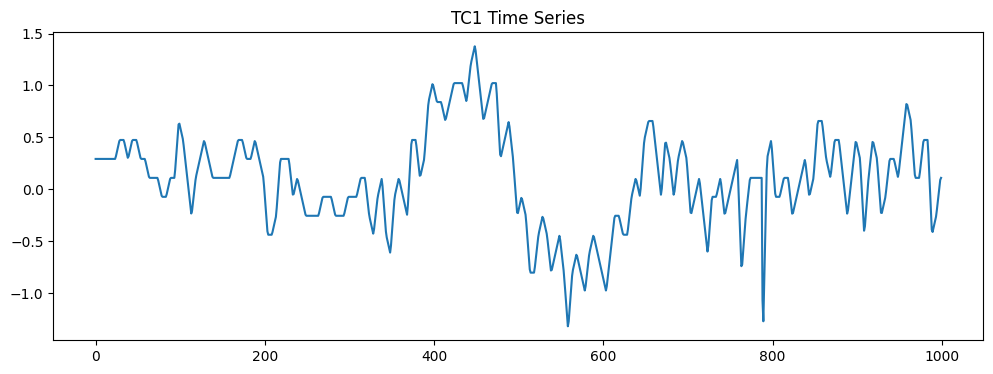

In [2]:
# Load data and select TC1 as time series to analyse
df = pd.read_csv("https://sacac.org.za/wp-content/uploads/2023/07/plantwide-chemicals-bauer-2007.csv", delimiter=';', decimal=',')
ts = df['TC1'].iloc[:1000]
ts.plot(title='TC1 Time Series', figsize=(12, 4))

🔍 It will be insightful to zoom in and plot the first 250 observations in the time series, but plot markers to clearly show the where the observations occur. Do so in the cell below:

<Axes: >

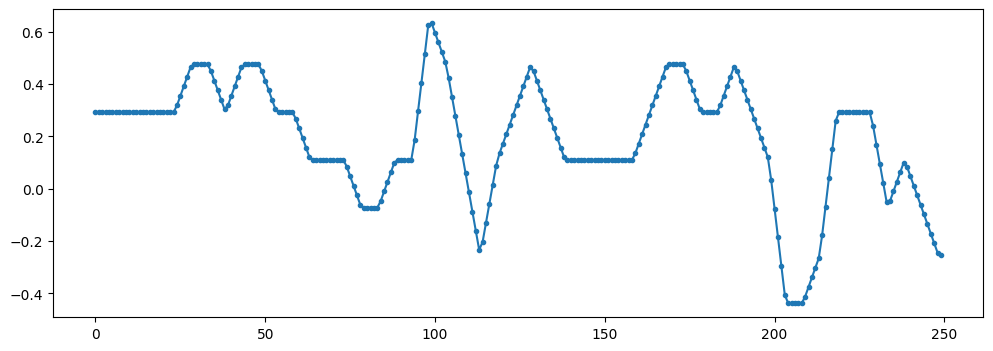

In [3]:
# <----- Add your code here
ts.iloc[:250].plot(figsize=(12, 4), marker = '.') # ANSWER

The first step in fitting any sort of ARIMA model is to plot the autocorrelation function (ACF) and partial autocorrelation function (PACF). 

🔍 Use  `statsmodels` to plot these functions for `ts`. Also assess the stationarity of the series by calculating the rolling mean and standard deviation. Based on the ACF and PACF, can you recommend a suitable ARIMA model?

<Axes: >

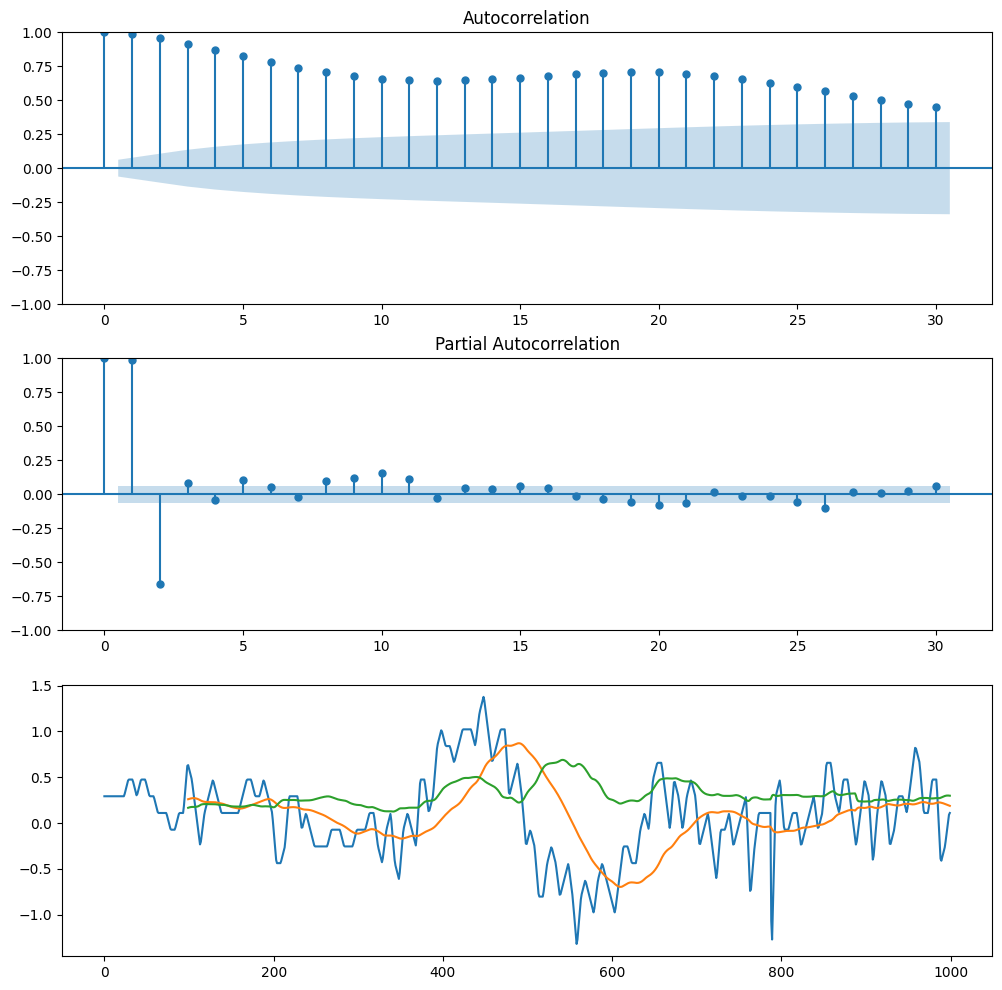

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# <----- Add your code here
### ANSWER
fig, ax = plt.subplots(3, 1,figsize=(12, 12))
plot_acf(ts, ax=ax[0])
plot_pacf(ts, ax=ax[1])

ts.plot(ax=ax[2])
ts.rolling(100).mean().plot(ax=ax[2])
ts.rolling(100).std().plot(ax=ax[2])
###

The `statsmodels` library has various implementations of the ARIMA models available. `AutoReg` is a purely autoregresive model (no moving average or difference components). It is less flexible, but the fitting procedure is much faster. `ARIMA` provides all the flexibility of an ARIMA model - you can even add seasonal and exogeneous components (i.e., SARIMAX).

Refer to the `statsmodels` API (or use an LLM like Claude) to help you fit and interpret the results. To help you get going, view the following:
* The API reference for `AutoReg` can be found [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AutoReg.html#statsmodels.tsa.ar_model.AutoReg).
* You first need to import the `AutoReg` model (code already provided), then create a model object, e.g., `model = AutoReg(ts, lags = 1)` will create an AR(1) model based on the data in `ts`.
* You can fit the model by calling `fitted_model = model.fit()`. 
* The `fitted_model` object has numerous methods that are useful in assessing the model fit. The first you can check is `fitted_model.summary()`. For a detailed description, see the [AutoRegResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoRegResults.html#statsmodels.tsa.ar_model.AutoRegResults).
* Both `AutoReg` and `ARIMA` provide `fitted_model` objects with the `plot_diagnostics` method as well as the `resid` property, that can be used to evaluate model accuracy.

Notice that the approach is a bit different to the `sklearn` API, where one would simply update the existing class using, e.g., `model.fit(ts)`. There are several Python libraries which use this more familiar API: [Darts](https://unit8co.github.io/darts/) and [skforecast](https://skforecast.org/0.16.0/) are two examples. We will use some of these libraries later, but for now the `statsmodels` library is more suitable for our purposes. Both Darts and skforecast simply provide wrappers to the `statsmodels` ARIMA object in any case.

🔍 Use `AutoReg` or `ARIMA` from `statsmodels` to fit a suitable model to the data. Use the ACF and/or PACF to inform your model selection, and use the fitted model object to plot the residuals.

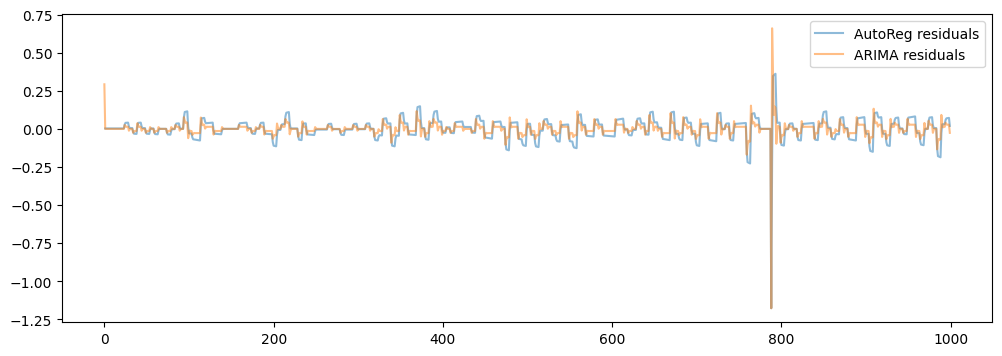

In [5]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# <----- Add your code here
### ANSWER
model_AR = AutoReg(ts, lags=1)
fit_AR = model_AR.fit()
model_ARIMA = ARIMA(ts, order = (3,1,0))
fit_ARIMA = model_ARIMA.fit()

fig = plt.figure(figsize=(12,4))
plt.plot(fit_AR.resid, label = 'AutoReg residuals', alpha = 0.5)
plt.plot(fit_ARIMA.resid, label = 'ARIMA residuals', alpha = 0.5)
plt.legend()
###

The `preds = fitted_model.get_prediction()` method will return in sample one-step ahead predictions. The `preds` object includes the predicted mean as well as confidence intervals. These are overly optimistic as real data is used to generate the predictions. Later, we will discuss how to generate multi-step ahead predictions recursively, which gives far better insight into the model accuracy.

🔍 Create the `preds` object using the supplied code. The code shows how to plot the predicted mean.

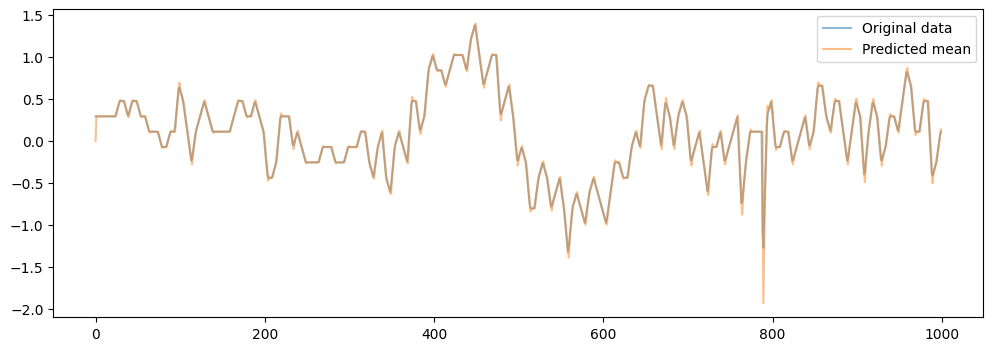

In [6]:
# <----- Add your code here
preds = fit_ARIMA.get_prediction() # ANSWER

fig = plt.figure(figsize=(12,4))
plt.plot(ts, label = 'Original data', alpha = 0.5)
plt.plot(preds.predicted_mean, label = 'Predicted mean', alpha = 0.5)
plt.legend()